# 一维数据的整理

## 数据的核心指标

In [4]:
# 导入必要的库  
import numpy as np  
import pandas as pd  
# 将Jupyter Notebook的输出控制在小数点后三位  
%precision 3  
# 将Pandas DataFrame的输出控制在小数点以下三位  

'%.3f'

In [13]:
import os  
print(os.path.abspath('.'))

C:\Users\lenovo\Python统计分析基础及实践


In [33]:
df = pd.read_csv(r'C:\Users\lenovo\Python统计分析基础及实践\ch2_scores_em.csv',encoding='gb2312',sep=',')
# 显示df的前5行
df.head()

学生编号  英语  数学
0     1  42  65
1     2  69  80
2     3  56  63
3     4  41  63
4     5  57  76

In [41]:
scores1 = np.array(df['英语'])
scores1

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [42]:
scores = np.array(df['英语'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [80]:
scores_df = pd.DataFrame({'分数':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='学生'))
scores_df

分数
学生    
A   42
B   69
C   56
D   41
E   57
F   48
G   65
H   49
I   65
J   58

### 平均值

In [44]:
sum(scores1)/len(scores1)

58.380

In [37]:
sum(scores) / len(scores)

55.000

In [45]:
np.mean(scores1)

58.380

In [6]:
np.mean(scores)

55.000

In [46]:
df.mean()

学生编号    25.50
英语      58.38
数学      78.88
dtype: float64

In [7]:
scores_df.mean()

分数    55.0
dtype: float64

### 中位数

In [59]:
sorted_scores = np.sort(scores1)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [55]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

57.500

In [48]:
np.median(scores1)

57.500

In [49]:
df.median()

学生编号    25.5
英语      57.5
数学      80.0
dtype: float64

In [47]:
np.median(scores)

56.500

In [51]:
df.describe()

学生编号         英语         数学
count  50.00000  50.000000  50.000000
mean   25.50000  58.380000  78.880000
std    14.57738   9.799813   8.414371
min     1.00000  37.000000  57.000000
25%    13.25000  54.000000  76.000000
50%    25.50000  57.500000  80.000000
75%    37.75000  65.000000  84.000000
max    50.00000  79.000000  94.000000

In [11]:
scores_df.median()

分数    56.5
dtype: float64

### 众数

In [56]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [57]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 数据偏差的指标

### 方差和标准差

#### 偏差

In [69]:
scores1 = np.array(df['英语'])
scores1

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [70]:
np.mean(scores1)

58.380

In [68]:
mean = np.mean(scores1)
deviation = scores1 - mean
deviation

array([-16.38,  10.62,  -2.38, -17.38,  -1.38, -10.38,   6.62,  -9.38,
         6.62,  -0.38,  11.62, -11.38,  -7.38,   5.62,   3.62,  11.62,
        12.62,   9.62,  14.62, -21.38,   6.62,   6.62,   2.62,  -6.38,
        -1.38,  -1.38,  16.62,   2.62, -11.38,  -4.38,   7.62,  -4.38,
        -4.38, -16.38, -21.38,  20.62,  -2.38,   3.62,   3.62,  -3.38,
         4.62,  -1.38,  -1.38,   8.62,  -3.38, -13.38,   7.62,  -3.38,
         5.62,   7.62])

In [94]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(scores1)
another_deviation = another_scores - another_mean
another_deviation

array([-8.38,  1.62, -0.38, -4.38, -7.38, -2.38, -1.38, -5.38, -6.38,
        0.62])

In [78]:
np.mean(deviation)

-0.000

In [79]:
np.mean(another_deviation)

0.000

In [95]:
summary_df = df.copy()
summary_df['英语均值'] = another_mean
summary_df['英语偏差'] = deviation
summary_df

学生编号  英语  数学   英语均值   英语偏差
0      1  42  65  58.38 -16.38
1      2  69  80  58.38  10.62
2      3  56  63  58.38  -2.38
3      4  41  63  58.38 -17.38
4      5  57  76  58.38  -1.38
5      6  48  60  58.38 -10.38
6      7  65  81  58.38   6.62
7      8  49  66  58.38  -9.38
8      9  65  78  58.38   6.62
9     10  58  82  58.38  -0.38
10    11  70  94  58.38  11.62
11    12  47  75  58.38 -11.38
12    13  51  70  58.38  -7.38
13    14  64  77  58.38   5.62
14    15  62  84  58.38   3.62
15    16  70  84  58.38  11.62
16    17  71  82  58.38  12.62
17    18  68  85  58.38   9.62
18    19  73  90  58.38  14.62
19    20  37  70  58.38 -21.38
20    21  65  78  58.38   6.62
21    22  65  93  58.38   6.62
22    23  61  77  58.38   2.62
23    24  52  88  58.38  -6.38
24    25  57  82  58.38  -1.38
25    26  57  76  58.38  -1.38
26    27  75  87  58.38  16.62
27    28  61  84  58.38   2.62
28    29  47  77  58.38 -11.38
29    30  54  82  58.38  -4.38
30    31  66  91  58.38   7.62
31    32  54  75  58.38  -4.38
32    33  54  76  58.38  -4.38
33    34  42  78  58.38 -16.38
34    35  37  57  58.38 -21.38
35    36  79  89  58.38  20.62
36    37  56  83  58.38  -2.38
37    38  62  69  58.38   3.62
38    39  62  86  58.38   3.62
39    40  55  81  58.38  -3.38
40    41  63  81  58.38   4.62
41    42  57  80  58.38  -1.38
42    43  57  79  58.38  -1.38
43    44  67  87  58.38   8.62
44    45  55  84  58.38  -3.38
45    46  45  71  58.38 -13.38
46    47  66  80  58.38   7.62
47    48  55  77  58.38  -3.38
48    49  64  83  58.38   5.62
49    50  66  88  58.38   7.62

In [91]:
summary_df.mean()

学生编号    2.550000e+01
英语      5.838000e+01
数学      7.888000e+01
英语均值    5.500000e+01
英语偏差   -2.557954e-15
dtype: float64

#### 方差

In [96]:
np.mean(deviation ** 2)

94.116

In [98]:
np.var(scores1)

94.116

In [100]:
scores_df.var()

分数    95.555556
dtype: float64

In [23]:
summary_df['偏差平方'] = np.square(deviation)
summary_df

分数    偏差   偏差平方
学生                 
A   42 -13.0  169.0
B   69  14.0  196.0
C   56   1.0    1.0
D   41 -14.0  196.0
E   57   2.0    4.0
F   48  -7.0   49.0
G   65  10.0  100.0
H   49  -6.0   36.0
I   65  10.0  100.0
J   58   3.0    9.0

In [24]:
summary_df.mean()

分数      55.0
偏差       0.0
偏差平方    86.0
dtype: float64

#### 标准差

In [25]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [26]:
np.std(scores, ddof=0)

9.274

### 极差和四分位差

#### 极差

In [27]:
np.max(scores) - np.min(scores)

28

#### 四分位差

In [28]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

### 数据指标汇总

In [29]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 数据的归一化

### 标准化

In [30]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [31]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 偏差值

In [32]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)

In [33]:
scores_df['偏差值'] = z
scores_df

分数     偏差值
学生            
A   42  35.982
B   69  65.097
C   56  51.078
D   41  34.903
E   57  52.157
F   48  42.452
G   65  60.783
H   49  43.530
I   65  60.783
J   58  53.235

## 数据的可视化

In [34]:
# 50名学生英语分数的array
english_scores = np.array(df['英语'])
# 转换成Series，用describe显示
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 频数分布表

In [35]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [36]:
# 0~10, 10~20，…这样的字符串列表
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# 以freq_class为索引，用freq创建DataFrame
freq_dist_df = pd.DataFrame({'频数':freq},
                            index=pd.Index(freq_class,
                                           name='级'))
freq_dist_df

频数
级        
0~10     0
10~20    0
20~30    0
30~40    2
40~50    8
50~60   16
60~70   18
70~80    6
80~90    0
90~100   0

In [37]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [38]:
rel_freq = freq / freq.sum()
rel_freq

array([ 0.  ,  0.  ,  0.  ,  0.04,  0.16,  0.32,  0.36,  0.12,  0.  ,  0.  ])

In [39]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([ 0.  ,  0.  ,  0.  ,  0.04,  0.2 ,  0.52,  0.88,  1.  ,  1.  ,  1.  ])

In [40]:
freq_dist_df['级值'] = class_value
freq_dist_df['相对频数'] = rel_freq
freq_dist_df['累积相对频数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['级值', '频数',
                             '相对频数', '累积相对频数']]

freq_dist_df

级值  频数  相对频数  累积相对频数
级                           
0~10      5   0  0.00    0.00
10~20    15   0  0.00    0.00
20~30    25   0  0.00    0.00
30~40    35   2  0.04    0.04
40~50    45   8  0.16    0.20
50~60    55  16  0.32    0.52
60~70    65  18  0.36    0.88
70~80    75   6  0.12    1.00
80~90    85   0  0.00    1.00
90~100   95   0  0.00    1.00

#### 众数再讨论

In [41]:
freq_dist_df.loc[freq_dist_df['频数'].idxmax(), '级值']

65

### 直方图

In [42]:
# 用plt的名字导入Matplotlib的pyplot模块
import matplotlib.pyplot as plt

# 让图表显示在notebook上
%matplotlib inline

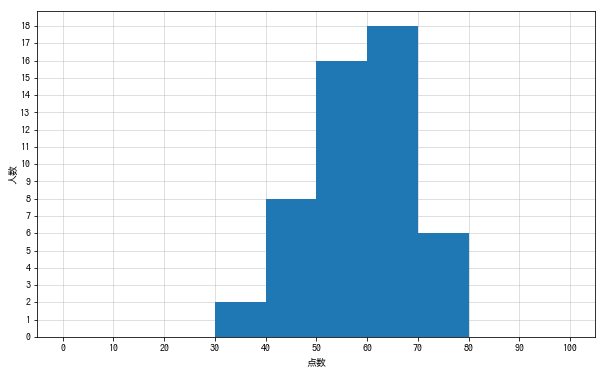

In [43]:
# 制作画布
# 用figsize指定横、竖大小
fig = plt.figure(figsize=(10, 6))
# 在画布上创建用于绘制图表的区域
# 参数表示创建一个1x1区域，绘制在第一个区域
ax = fig.add_subplot(111)

# 以级数为10绘制直方图
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# 在X轴上添加标签
ax.set_xlabel('分数')
# 在Y轴上添加标签
ax.set_ylabel('人数')
# 在X轴标上0, 10, 20，...这样的刻度
ax.set_xticks(np.linspace(0, 100, 10+1))
# 在Y轴标上0, 1, 2, ...这样的刻度
ax.set_yticks(np.arange(0, freq.max()+1))
# 显示图表
plt.show()

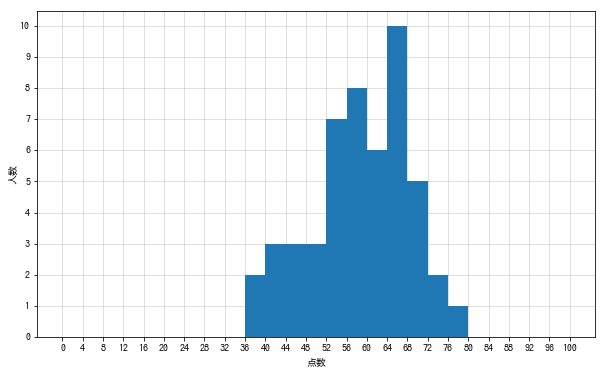

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('分数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

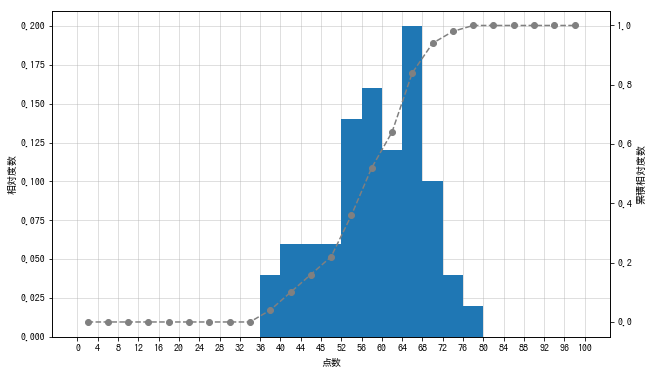

In [47]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# 将Y轴大小不同的图表放在与ax1相同的区域上
ax2 = ax1.twinx()

# 为了制作相对频数的直方图，需要用频数除以数据的数量
# 这可以通过指定hist的参数weight来实现
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 折线图的绘制
# 将参数1s设为‘--’，使直线变成虚线
# 通过将参数marker设为‘o’，将数据点显示为圆形
# 将参数color设为‘gray’，将数据点和线条显示为灰色
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 删除折线图中的网格
ax2.grid(visible=False)

ax1.set_xlabel('分数')
ax1.set_ylabel('相对频数')
ax2.set_ylabel('累积相对频数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 箱线图

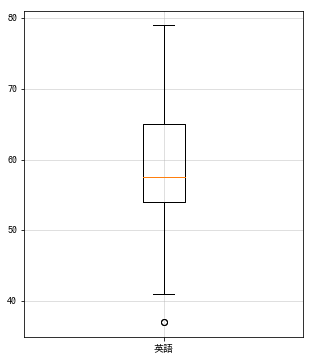

In [46]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英语'])

plt.show()